https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df2 = df1[['location','size','total_sqft','bath','balcony','price']]
df2.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


**Handle NA values**

In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2.total_sqft.isnull().sum()

0

In [9]:
df3 = df2[(df2['size'].notnull() & df2['location'].notnull())]
df3.isnull().sum()

location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [10]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
type(df3.total_sqft[0])

str

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,NaN,NaN,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [16]:
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
df3[df3.total_sqft.isnull()]

,location,size,total_sqft,bath,balcony,price,bhk
410,Kengeri,1 BHK,NaN,1.0,0.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,NaN,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,1.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,NaN,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,0.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,1.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,1.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,1.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,1.0,76.00,3


In [18]:
df4 = df3[~(df3.total_sqft.isnull())]
df4.total_sqft.isnull().sum()

0

<h2 style="color:purple">Clean up data using price per square feet</h2>

**Find out price per square feet**

In [19]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df4['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
max_price_per_sqft = int(max(df4['price_per_sqft']))
b = range(0,max_price_per_sqft,10000)

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

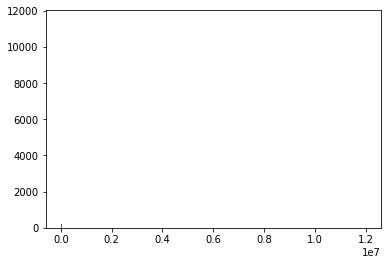

In [22]:
plt.hist(df4.price_per_sqft,bins=b)

**Use log scale for better viewing of the chart**

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

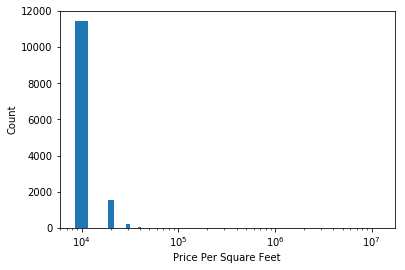

In [23]:
plt.xscale('log')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df4.price_per_sqft,bins=b, rwidth=0.3,align='right')

**Based on above chart it looks like we should exclude anything that has price_per_sqft > 10000. But before excluding them
let's eyeball those data points that are going to be excluded**

In [24]:
df4[df4.price_per_sqft>10000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,NaN,600.0,4,18181.818182
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,4,10592.459605
18,Ramakrishnappa Layout,3 BHK,2770.0,4.0,2.0,290.0,3,10469.314079
22,Thanisandra,4 Bedroom,2800.0,5.0,2.0,380.0,4,13571.428571
45,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
48,KR Puram,2 Bedroom,800.0,1.0,1.0,130.0,2,16250.000000
57,Ramakrishnappa Layout,2 BHK,1500.0,2.0,2.0,185.0,2,12333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
62,Whitefield,4 Bedroom,5700.0,5.0,3.0,650.0,4,11403.508772


**As a data scientist you will give this report to your business manager for verification. Business manager might say that 4 BHK flat in Rajaji nagar with 6 crore price seems ok and should not be removed. Now you change your criteria further to exclude properties with price_per_sqft < 20000**

In [25]:
df4[df4.price_per_sqft>20000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.00,6.0,NaN,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.00,9.0,NaN,200.0,8,33333.333333
89,Rajaji Nagar,6 Bedroom,710.00,6.0,3.0,160.0,6,22535.211268
159,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,0.0,760.0,4,20266.666667
192,Bellandur,4 Bedroom,1200.00,5.0,NaN,325.0,4,27083.333333
349,Suragajakkanahalli,3 Bedroom,11.00,3.0,2.0,74.0,3,672727.272727
413,Mahalakshmi Layout,6 Bedroom,1200.00,7.0,3.0,250.0,6,20833.333333
434,7th Phase JP Nagar,8 Bedroom,1200.00,8.0,NaN,250.0,8,20833.333333
480,RMV 2nd Stage,4 BHK,1150.00,4.0,2.0,260.0,4,22608.695652
743,Cunningham Road,4 BHK,5270.00,4.0,3.0,1250.0,4,23719.165085


(array([   9.,   21.,  496., 1955., 2935., 2519., 1636., 1003.,  556.,
         309.,  346.,  224.,  212.,  176.,  132.,  150.,  120.,   71.,
          71.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000]),
 <a list of 19 Patch objects>)

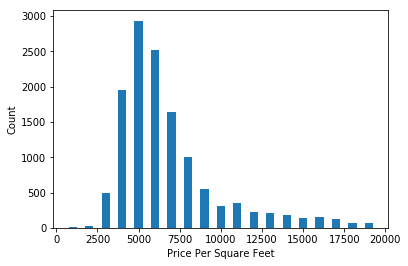

In [26]:
df5 = df4[~(df4.price_per_sqft>20000)]
max_price_per_sqft = int(max(df5['price_per_sqft']))
b = range(0,max_price_per_sqft,1000)

plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df5.price_per_sqft,bins=b, rwidth=0.5,align='right')

**Your business manager tells you that on the lower side, anything less than 2000 rs per square ft looks suspicious. He asks you to give report of such properties and you generate it as show below**

In [27]:
df5[df5.price_per_sqft<2000]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
132,Electronic City,2 BHK,880.0,1.0,1.0,16.5,2,1875.000000
514,Banashankari Stage III,4 Bedroom,8500.0,4.0,2.0,145.0,4,1705.882353
674,Yelahanka,3 BHK,35000.0,3.0,3.0,130.0,3,371.428571
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,1.0,80.0,4,729.860414
996,Chikkabanavar,1 Bedroom,1200.0,1.0,0.0,20.0,1,1666.666667
1894,Nelamangala,3 Bedroom,52272.0,2.0,1.0,140.0,3,267.829813
2404,Yelahanka New Town,1 BHK,960.0,2.0,1.0,18.0,1,1875.000000
2421,Basavanagara,4 Bedroom,2000.0,3.0,2.0,25.0,4,1250.000000
3976,Chikkathoguru,1 BHK,1500.0,1.0,1.0,19.5,1,1300.000000
4105,Indranagar 100ft road defence colony,5 BHK,5800.0,5.0,NaN,80.0,5,1379.310345


In [28]:
df6 = df5[~(df5.price_per_sqft<2000)]
df6.shape

(12991, 8)

<h2 style="color:purple">Lets check BHK feature now</h2>

(array([0.000e+00, 6.270e+02, 5.504e+03, 4.811e+03, 1.307e+03, 3.160e+02,
        1.960e+02, 9.200e+01, 7.400e+01, 4.300e+01, 1.100e+01, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Patch objects>)

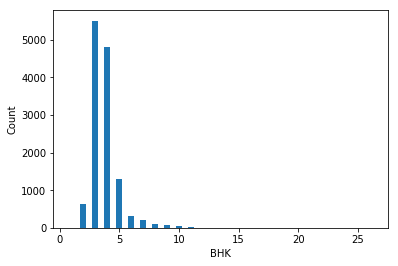

In [29]:
plt.xlabel('BHK')
plt.ylabel('Count')
plt.hist(df6.bhk,bins=range(0,max(df6.bhk)), rwidth=0.5, align='right')

In [30]:
df6[df6.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,1 Giri Nagar,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,1 Ramamurthy Nagar,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
3609,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0,16,5500.000000
3853,1 Annasandrapalya,11 Bedroom,1200.0,6.0,3.0,150.0,11,12500.000000
4916,1Channasandra,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Mysore Road,12 Bedroom,2232.0,6.0,2.0,300.0,12,13440.860215
7979,1 Immadihalli,11 BHK,6000.0,12.0,NaN,150.0,11,2500.000000
9935,1Hoysalanagar,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424
11559,1Kasavanhalli,18 Bedroom,1200.0,18.0,NaN,200.0,18,16666.666667


**Your business manager who is real estate expert tells you that general norm is to have 3 BHK per 1000 square ft. Based on thiis criteria you can detect outliers in that dataset**

In [31]:
df6[(df6.total_sqft/df6.bhk)<(1000/3)]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
26,Electronic City,2 BHK,660.0,1.0,1.0,23.10,2,3500.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.00,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.00,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,2.0,100.00,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.00,2,4782.608696
93,ISRO Layout,4 Bedroom,1200.0,4.0,2.0,155.00,4,12916.666667
101,Chandapura,2 BHK,650.0,1.0,1.0,17.00,2,2615.384615
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.00,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,115.00,7,12105.263158
133,Ramaswamy Palya - Kammanahalli Main Road,4 Bedroom,1200.0,4.0,0.0,210.00,4,17500.000000


In [32]:
df7 = df6[~((df6.total_sqft/df6.bhk)<(1000/3))]

In [33]:
df7.shape

(12080, 8)

<h2 style="color:purple">Location is a categorical variable. We need to do some dimensionality reduction here</h2>

In [34]:
df7.groupby('location')['location'].agg('count')

location
 Anekal                                             1
 Banaswadi                                          1
 Basavangudi                                        1
 Devarabeesana Halli                                6
 Devarachikkanahalli                               14
 Electronic City                                    2
 Mysore Highway                                     4
 Rachenahalli                                       2
 Sector 1 HSR Layout                                1
 Thanisandra                                        3
 Whitefield                                         1
 south                                              2
1 Giri Nagar                                        1
1 Immadihalli                                       1
12th cross srinivas nagar banshankari 3rd stage     1
1Hoysalanagar                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layo

In [35]:
df7.price_per_sqft.describe()

count    12080.000000
mean      5960.757704
std       2783.980286
min       2000.000000
25%       4200.000000
50%       5246.407610
75%       6750.000000
max      20000.000000
Name: price_per_sqft, dtype: float64

In [36]:
def get_tier(p):
    if p<=5000:
        return 'tier1'
    if p>5000 and p<=8000:
        return 'tier2'
    if p>8000 and p<=11000:
        return 'tier3'
    if p>11000 and p<=14000:
        return 'tier4'
    if p>14000 and p<=17000:
        return 'tier5'    
    if p>17000:
        return 'tier6'

In [37]:
loc_tier = {}
for index, row in df7.iterrows():
    if row.location not in loc_tier:
        loc_tier[row.location] = {
            'tier1': 0,
            'tier2': 0,
            'tier3': 0,
            'tier4': 0,
            'tier5': 0,
            'tier6': 0
        }
    tier = get_tier(row.price_per_sqft)
    loc_tier[row.location][tier] += 1

In [38]:
records = []
for loc, tiers in loc_tier.items():
    records.append({
        'location': loc,
        'tier1': tiers['tier1'],
        'tier2': tiers['tier2'],
        'tier3': tiers['tier3'],
        'tier4': tiers['tier4'],
        'tier5': tiers['tier5'],
        'tier6': tiers['tier6'],
    })

In [39]:
tier_df = pd.DataFrame(records)
tier_df.set_index('location',inplace=True)
tier_df.head()

,tier1,tier2,tier3,tier4,tier5,tier6
location,,,,,,
Electronic City Phase II,100,23,0,0,0,0
Chikka Tirupathi,12,5,0,0,0,0
Uttarahalli,157,20,1,0,0,0
Lingadheeranahalli,1,21,1,0,0,0
Kothanur,39,21,2,0,1,0


In [40]:
def select_tier(row):
    return row.idxmax()

In [41]:
tier_df['tier'] = tier_df.apply(select_tier,axis='columns')

In [42]:
tier_df.head(10)

,tier1,tier2,tier3,tier4,tier5,tier6,tier
location,,,,,,,
Electronic City Phase II,100,23,0,0,0,0,tier1
Chikka Tirupathi,12,5,0,0,0,0,tier1
Uttarahalli,157,20,1,0,0,0,tier1
Lingadheeranahalli,1,21,1,0,0,0,tier2
Kothanur,39,21,2,0,1,0,tier1
Whitefield,196,266,37,23,7,2,tier2
Old Airport Road,1,27,4,0,0,0,tier2
Rajaji Nagar,0,7,24,25,28,10,tier5
Marathahalli,61,98,8,2,1,0,tier2


In [43]:
tier_df[tier_df.tier=='tier6'].head()

,tier1,tier2,tier3,tier4,tier5,tier6,tier
location,,,,,,,
RMV,0,0,1,0,0,2,tier6
Sadashiva Nagar,0,0,0,1,1,6,tier6
Ramamohanapuram,0,0,0,0,0,1,tier6
Cunningham Road,0,0,0,1,0,7,tier6
2nd Block Koramangala,0,0,0,0,0,2,tier6


In [44]:
tier_df[tier_df.tier=='tier5'].head()

,tier1,tier2,tier3,tier4,tier5,tier6,tier
location,,,,,,,
Rajaji Nagar,0,7,24,25,28,10,tier5
Giri Nagar,0,1,0,2,3,2,tier5
Binny Mills Employees Colony,0,0,0,0,1,0,tier5
2nd Stage Nagarbhavi,0,2,0,0,4,1,tier5
7th Block Jayanagar,0,0,1,0,2,2,tier5


In [45]:
tier_df.shape

(1159, 7)

In [46]:
stats = tier_df.groupby('tier')['tier'].agg('count')
stats

tier
tier1    582
tier2    393
tier3     96
tier4     47
tier5     27
tier6     14
Name: tier, dtype: int64

In [47]:
stats.values

array([582, 393,  96,  47,  27,  14], dtype=int64)

<BarContainer object of 6 artists>

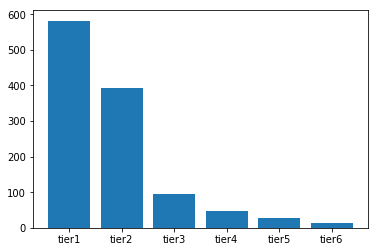

In [48]:
plt.bar(stats.index, stats.values)

In [49]:
df7.head(2)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615


In [50]:
df7['tier'] = df7.location.apply(lambda x: tier_df.loc[x]['tier'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,tier
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,tier1
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,tier1
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,tier1
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,tier2
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,tier1


<h2 style='color:purple'>Handle bathrooms feature</h2>

In [52]:
df7.bath.isnull().sum()

57

In [53]:
df8 = df7[df7.bath.notnull()]
df8.bath.isnull().sum()

0

In [54]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

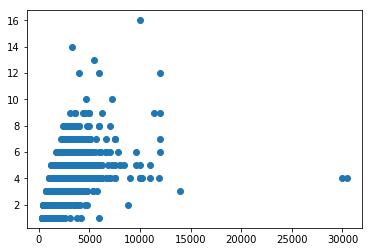

In [55]:
plt.scatter(df8.total_sqft,df8.bath)

In [56]:
df8[(df8.total_sqft/df8.bath) < (1000/3) ]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,tier
84,EPIP Zone,3 BHK,1499.00,5.0,2.0,102.0,3,6804.536358,tier2
209,Padmanabhanagar,4 Bedroom,1736.00,6.0,0.0,190.0,4,10944.700461,tier2
439,Kasavanhalli,3 Bedroom,1000.00,4.0,3.0,110.0,3,11000.000000,tier2
504,Shampura,1 BHK,375.00,2.0,0.0,26.0,1,6933.333333,tier1
603,Doddagubbi,3 Bedroom,1125.00,4.0,1.0,70.0,3,6222.222222,tier1
1068,2nd Stage Nagarbhavi,6 Bedroom,2400.00,8.0,3.0,450.0,6,18750.000000,tier5
1078,BTM 1st Stage,9 Bedroom,3300.00,14.0,NaN,500.0,9,15151.515152,tier2
1620,Marsur,3 Bedroom,1000.00,4.0,3.0,66.0,3,6600.000000,tier2
1671,Herohalli,5 Bedroom,1800.00,6.0,0.0,44.5,5,2472.222222,tier1
1978,BTM 2nd Stage,3 Bedroom,1260.00,5.0,1.0,185.0,3,14682.539683,tier2


In [57]:
df9 = df8[~((df8.total_sqft/df8.bath) < (1000/3)) ]
df9.shape

(11962, 9)

In [58]:
dummies = pd.get_dummies(df9.tier)
dummies.head()

,tier1,tier2,tier3,tier4,tier5,tier6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [59]:
dummies.drop('tier6',axis='columns',inplace=True)

In [60]:
df10 = pd.concat([df9,dummies],axis='columns')

In [61]:
df10.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,tier,tier1,tier2,tier3,tier4,tier5
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,tier1,1,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,tier1,1,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,tier1,1,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,tier2,0,1,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,tier1,1,0,0,0,0


In [62]:
df11 = df10.drop(['location','size','balcony','price_per_sqft','tier'],axis='columns')

In [63]:
df11.shape

(11962, 9)

In [64]:
df11.head()

,total_sqft,bath,price,bhk,tier1,tier2,tier3,tier4,tier5
0,1056.0,2.0,39.07,2,1,0,0,0,0
1,2600.0,5.0,120.00,4,1,0,0,0,0
2,1440.0,2.0,62.00,3,1,0,0,0,0
3,1521.0,3.0,95.00,3,0,1,0,0,0
4,1200.0,2.0,51.00,2,1,0,0,0,0


In [65]:
dftemp = df11[(df11.bhk==2) & (df11.bath==2) & (df11.tier1==1)]

In [66]:
dftemp.head()

,total_sqft,bath,price,bhk,tier1,tier2,tier3,tier4,tier5
0,1056.0,2.0,39.07,2,1,0,0,0,0
4,1200.0,2.0,51.00,2,1,0,0,0,0
13,1100.0,2.0,40.00,2,1,0,0,0,0
15,1175.0,2.0,73.50,2,1,0,0,0,0
19,1100.0,2.0,48.00,2,1,0,0,0,0


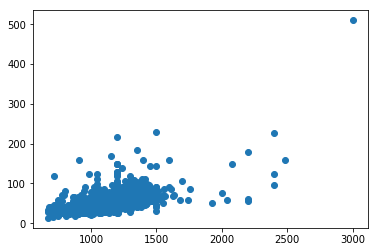

In [67]:
plt.scatter(dftemp.total_sqft,dftemp.price)

<h2 style='color:purple'>Build a model now</h2>

In [68]:
X = df11.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,tier1,tier2,tier3,tier4,tier5
0,1056.0,2.0,2,1,0,0,0,0
1,2600.0,5.0,4,1,0,0,0,0
2,1440.0,2.0,3,1,0,0,0,0
3,1521.0,3.0,3,0,1,0,0,0
4,1200.0,2.0,2,1,0,0,0,0


In [69]:
X.shape

(11962, 8)

In [70]:
y = df11.price
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [71]:
len(y)

11962

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
len(X_train)

9569

In [75]:
len(X_test)

2393

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
model.score(X_test,y_test)

0.7378694890552453

<h2 style='color:purple'>Use K-Fold cross validation to measure score of a model</h2>

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
cross_val_score(LinearRegression(), X,y,cv=10)

array([0.77887482, 0.79813809, 0.71873219, 0.73208172, 0.75941746,
       0.73426984, 0.7522922 , 0.73804447, 0.74377453, 0.75164493])

**If this was a classification problem, we could have used different classification algorithms and GridSearchCV to come up with best algorithm and best hyperparameters**

In [81]:
X_test.head(10)

,total_sqft,bath,bhk,tier1,tier2,tier3,tier4,tier5
10528,1265.0,2.0,2,0,1,0,0,0
5818,3532.0,3.0,4,0,1,0,0,0
2008,1521.0,3.0,3,0,1,0,0,0
4769,1310.0,2.0,3,1,0,0,0,0
10189,1200.0,2.0,2,0,1,0,0,0
12408,3295.0,3.0,3,0,1,0,0,0
2325,1655.0,3.0,3,0,1,0,0,0
12478,1194.0,2.0,2,1,0,0,0,0
4618,1070.0,2.0,2,1,0,0,0,0
11654,648.0,1.0,1,0,1,0,0,0


In [82]:
y_test.head(10)

10528     68.00
5818     170.00
2008      94.99
4769      32.75
10189    135.00
12408    310.00
2325     115.00
12478     46.00
4618      42.80
11654     40.00
Name: price, dtype: float64

In [83]:
model.predict(X_test[:10])

array([ 78.56165646, 267.87973049, 100.02834669,  57.91431519,
        72.84470152, 256.05723999, 111.81406918,  56.7341562 ,
        45.82796524,  25.34387803])

In [90]:
 df_test = pd.DataFrame([{
            'total_sqft': 1056,
            'bhk': 2,
            'bath': 2,
            'tier1': 1,
            'tier2': 0,
            'tier3': 0,
            'tier4': 0,
            'tier5': 0
        }])

df_test

,bath,bhk,tier1,tier2,tier3,tier4,tier5,total_sqft
0,2,2,1,0,0,0,0,1056


In [92]:
model.predict([[1056,2,2,1,0,0,0,0]])

array([44.5966211])

<h2 style='color:purple'>Export trained model and other artifacts</h2>

In [84]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [85]:
tier_df.head()

,tier1,tier2,tier3,tier4,tier5,tier6,tier
location,,,,,,,
Electronic City Phase II,100,23,0,0,0,0,tier1
Chikka Tirupathi,12,5,0,0,0,0,tier1
Uttarahalli,157,20,1,0,0,0,tier1
Lingadheeranahalli,1,21,1,0,0,0,tier2
Kothanur,39,21,2,0,1,0,tier1


In [86]:
tier_df[['tier']].head()

,tier
location,
Electronic City Phase II,tier1
Chikka Tirupathi,tier1
Uttarahalli,tier1
Lingadheeranahalli,tier2
Kothanur,tier1


In [87]:
tier_df.index = tier_df.index.str.lower()

In [88]:
with open('location_tiers.pickle','wb') as f:
    pickle.dump(tier_df[['tier']],f)